In [203]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from ast import literal_eval
import json
from pathlib import Path

In [204]:
GRAPHLOC = Path('graphs/fm') 

In [205]:
pi_fm = pd.read_csv('data/pi_fm.csv')
vi_fm = pd.read_csv('data/vi_fm.csv')
ql_fm = pd.read_csv('data/ql_fm.csv')



In [206]:
def plot_data(df, title="Stock prices", xlabel="Date", ylabel="Price",path='test.png'):
    import matplotlib.pyplot as plt
    """Plot stock prices with a custom title and meaningful axis labels."""
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.savefig(path, dpi=100)
    plt.close()

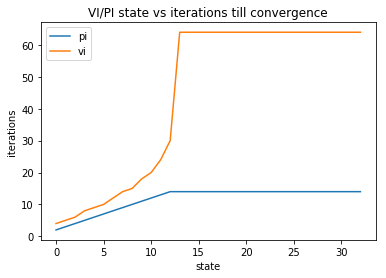

In [207]:
ql_iters = ql_fm['conv_iters'].values
vi_iters = vi_fm['conv_iters'].values
pi_iters = pi_fm['conv_iters'].values

df = pd.DataFrame(data=list(zip(
        pi_iters,vi_iters)),
            columns = ['pi','vi'])
df.name = 'states'

df.plot(kind='line')
plt.xlabel('state')
plt.ylabel('iterations')
plt.title('VI/PI state vs iterations till convergence')

plt.savefig(GRAPHLOC/'fig1.png')

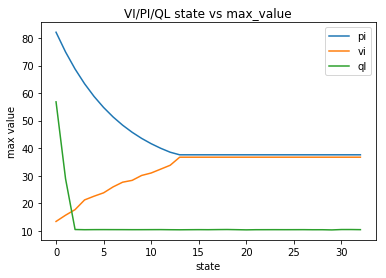

In [208]:
pi_ = pi_fm['max_value'].values
vi_ = vi_fm['max_value'].values
ql_ = ql_fm['max_value'].values

df = pd.DataFrame(data=list(zip(
        pi_,vi_,ql_)),
            columns = ['pi','vi','ql'])

df.plot(kind='line')
plt.xlabel('state')
plt.ylabel('max value')
plt.title('VI/PI/QL state vs max_value')
plt.savefig(GRAPHLOC/'fig2.png')

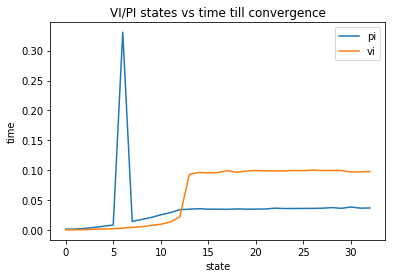

In [210]:
pi_ = pi_fm['times_api'].values
vi_ = vi_fm['times_api'].values
ql_ = ql_fm['times_api'].values

df = pd.DataFrame(data=list(zip(
        pi_,vi_)),
            columns = ['pi','vi'])

df.plot(kind='line')
plt.xlabel('state')
plt.ylabel('time')
plt.title('VI/PI states vs time till convergence')
plt.savefig(GRAPHLOC/'fig3.png')

### Talk about how thte policies are the same


### Policy Iteration Exploration

In [211]:
pig4 = pd.read_csv('data/fm_pi_gammas4.csv')
pig8 = pd.read_csv('data/fm_pi_gammas8.csv')
pig12 = pd.read_csv('data/fm_pi_gammas12.csv')
pig16 = pd.read_csv('data/fm_pi_gammas16.csv')


In [212]:
pig4.head()

,Unnamed: 0,gammas,conv_iters,max_value,times_api,times_real,policy_updates,policies,V,all_stats
0,0,0.05,1,4.188719,0.000319,0.000490,1,"(0, 1, 1, 0)","(0.04532863258625033, 1.0022664316293126, 1.00...","[{'State': None, 'Action': None, 'Reward': 4.1..."
1,1,0.10,1,4.396613,0.000307,0.000468,1,"(0, 1, 1, 0)","(0.09174311926605505, 1.0091743119266054, 1.00...","[{'State': None, 'Action': None, 'Reward': 4.3..."
2,2,0.15,1,4.626704,0.000312,0.000480,1,"(0, 1, 1, 0)","(0.13993262503239184, 1.0209898937548587, 1.02...","[{'State': None, 'Action': None, 'Reward': 4.6..."
3,3,0.20,1,4.882699,0.000311,0.000477,1,"(0, 1, 1, 0)","(0.1906779661016949, 1.0381355932203389, 1.038...","[{'State': None, 'Action': None, 'Reward': 4.8..."
4,4,0.25,2,5.169190,0.000928,0.000789,2,"(0, 1, 0, 0)","(0.24489795918367352, 1.0612244897959184, 1.16...","[{'State': None, 'Action': None, 'Reward': 5.1..."


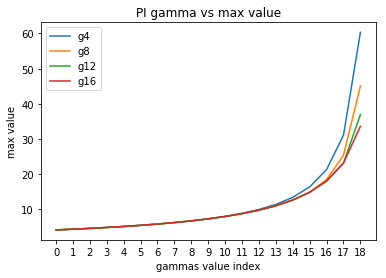

In [214]:
g4 = pig4['max_value'].values
g8 = pig8['max_value'].values
g12 = pig12['max_value'].values
g16 = pig16['max_value'].values




df = pd.DataFrame(data=list(zip(
        g4,g8,g12,g16)),
            columns = ['g4','g8','g12','g16'])
#df.set_index(pig4['gammas'])
df.plot(kind='line')
plt.xlabel('gammas value index')
plt.ylabel('max value')
plt.xticks(df.index)

plt.title('PI gamma vs max value')

plt.savefig(GRAPHLOC/'fig4.png')

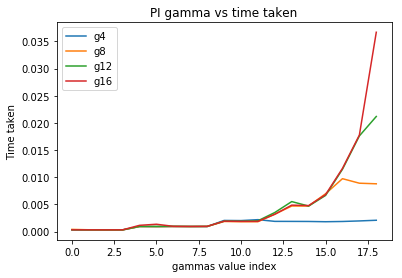

In [215]:
g4 = pig4['times_api'].values
g8 = pig8['times_api'].values
g12 = pig12['times_api'].values
g16 = pig16['times_api'].values




df = pd.DataFrame(data=list(zip(
        g4,g8,g12,g16)),
            columns = ['g4','g8','g12','g16'])
#df.set_index(pig4['gammas'])
df.plot(kind='line')
plt.xlabel('gammas value index')
plt.ylabel('Time taken')

plt.title('PI gamma vs time taken')

plt.savefig(GRAPHLOC/'fig5.png')

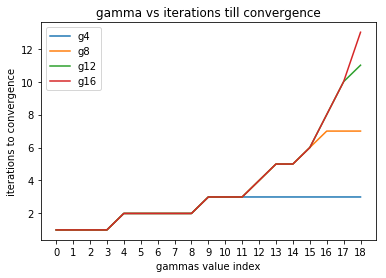

In [216]:
g4 = pig4['conv_iters'].values
g8 = pig8['conv_iters'].values
g12 = pig12['conv_iters'].values
g16 = pig16['conv_iters'].values




df = pd.DataFrame(data=list(zip(
        g4,g8,g12,g16)),
            columns = ['g4','g8','g12','g16'])
#df.set_index(pig4['gammas'])
df.plot(kind='line')
plt.xlabel('gammas value index')
plt.ylabel('iterations to convergence')
plt.xticks(df.index)
plt.title('gamma vs iterations till convergence')

plt.savefig(GRAPHLOC/'fig6.png')

array(['(0, 1, 1, 1, 1, 1, 1, 0)', '(0, 1, 1, 1, 1, 1, 1, 0)',
       '(0, 1, 1, 1, 1, 1, 1, 0)', '(0, 1, 1, 1, 1, 1, 1, 0)',
       '(0, 1, 1, 1, 1, 1, 0, 0)', '(0, 1, 1, 1, 1, 1, 0, 0)',
       '(0, 1, 1, 1, 1, 1, 0, 0)', '(0, 1, 1, 1, 1, 1, 0, 0)',
       '(0, 1, 1, 1, 1, 1, 0, 0)', '(0, 1, 1, 1, 1, 0, 0, 0)',
       '(0, 1, 1, 1, 1, 0, 0, 0)', '(0, 1, 1, 1, 1, 0, 0, 0)',
       '(0, 1, 1, 1, 0, 0, 0, 0)', '(0, 1, 1, 0, 0, 0, 0, 0)',
       '(0, 1, 1, 0, 0, 0, 0, 0)', '(0, 1, 0, 0, 0, 0, 0, 0)',
       '(0, 0, 0, 0, 0, 0, 0, 0)', '(0, 0, 0, 0, 0, 0, 0, 0)',
       '(0, 0, 0, 0, 0, 0, 0, 0)'], dtype=object)

###  Value Iteration

In [217]:
vig4 = pd.read_csv('data/fm_vi_gammas4.csv')
vig8 = pd.read_csv('data/fm_vi_gammas8.csv')
vig12 = pd.read_csv('data/fm_vi_gammas12.csv')
vig16 = pd.read_csv('data/fm_vi_gammas16.csv')

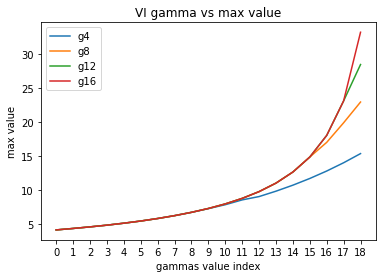

In [218]:
g4 = vig4['max_value'].values
g8 = vig8['max_value'].values
g12 = vig12['max_value'].values
g16 = vig16['max_value'].values




df = pd.DataFrame(data=list(zip(
        g4,g8,g12,g16)),
            columns = ['g4','g8','g12','g16'])
#df.set_index(pig4['gammas'])
df.plot(kind='line')
plt.xlabel('gammas value index')
plt.ylabel('max value')
plt.xticks(df.index)

plt.title('VI gamma vs max value')

plt.savefig(GRAPHLOC/'fig7.png')

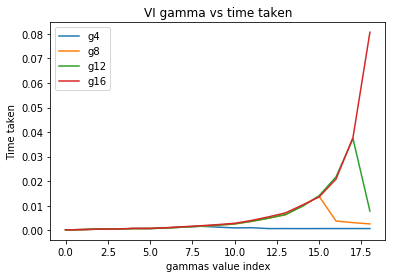

In [220]:
g4 = vig4['times_api'].values
g8 = vig8['times_api'].values
g12 = vig12['times_api'].values
g16 = vig16['times_api'].values




df = pd.DataFrame(data=list(zip(
        g4,g8,g12,g16)),
            columns = ['g4','g8','g12','g16'])
#df.set_index(pig4['gammas'])
df.plot(kind='line')
plt.xlabel('gammas value index')
plt.ylabel('Time taken')

plt.title('VI gamma vs time taken')

plt.savefig(GRAPHLOC/'fig8.png')

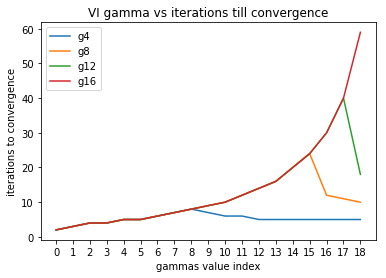

In [221]:
g4 = vig4['conv_iters'].values
g8 = vig8['conv_iters'].values
g12 = vig12['conv_iters'].values
g16 = vig16['conv_iters'].values




df = pd.DataFrame(data=list(zip(
        g4,g8,g12,g16)),
            columns = ['g4','g8','g12','g16'])
#df.set_index(pig4['gammas'])
df.plot(kind='line')
plt.xlabel('gammas value index')
plt.ylabel('iterations to convergence')
plt.xticks(df.index)
plt.title('VI gamma vs iterations till convergence')

plt.savefig(GRAPHLOC/'fig9.png')

## Q learning

In [222]:
qlg4 = pd.read_csv('data/fm_ql_gamma_m4.csv')
qlg8 = pd.read_csv('data/fm_ql_gamma_m8.csv')
qlg12 = pd.read_csv('data/fm_ql_gamma_m12.csv')
qlg16 = pd.read_csv('data/fm_ql_gamma_m16.csv')

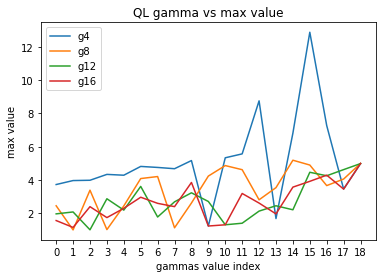

In [223]:
g4 = qlg4['max_value'].values
g8 = qlg8['max_value'].values
g12 = qlg12['max_value'].values
g16 = qlg16['max_value'].values




df = pd.DataFrame(data=list(zip(
        g4,g8,g12,g16)),
            columns = ['g4','g8','g12','g16'])
#df.set_index(pig4['gammas'])
df.plot(kind='line')
plt.xlabel('gammas value index')
plt.ylabel('max value')
plt.xticks(df.index)

plt.title('QL gamma vs max value')

plt.savefig(GRAPHLOC/'fig10.png')

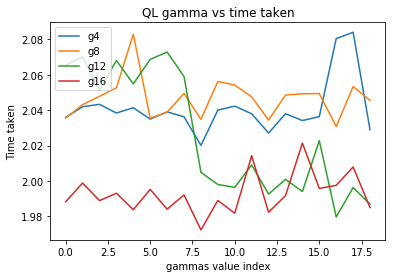

In [224]:
g4 = qlg4['times_api'].values
g8 = qlg8['times_api'].values
g12 = qlg12['times_api'].values
g16 = qlg16['times_api'].values




df = pd.DataFrame(data=list(zip(
        g4,g8,g12,g16)),
            columns = ['g4','g8','g12','g16'])
#df.set_index(pig4['gammas'])
df.plot(kind='line')
plt.xlabel('gammas value index')
plt.ylabel('Time taken')

plt.title('QL gamma vs time taken')

plt.savefig(GRAPHLOC/'fig11.png')

In [232]:
qled4 = pd.read_csv('data/fm_ql_eps_m4d.csv')
qled8 = pd.read_csv('data/fm_ql_eps_m8d.csv')
qled12 = pd.read_csv('data/fm_ql_eps_m12d.csv')
qled16 = pd.read_csv('data/fm_ql_eps_m16d.csv')

qlend4 = pd.read_csv('data/fm_ql_eps_m4nd.csv')
qlend8 = pd.read_csv('data/fm_ql_eps_m8nd.csv')
qlend12 = pd.read_csv('data/fm_ql_eps_m12nd.csv')
qlend16 = pd.read_csv('data/fm_ql_eps_m16nd.csv')

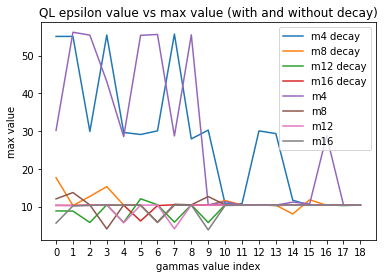

In [233]:
g4 = qled4['max_value'].values
g8 = qled8['max_value'].values
g12 = qled12['max_value'].values
g16 = qled16['max_value'].values

g24 = qlend4['max_value'].values
g28 = qlend8['max_value'].values
g212 = qlend12['max_value'].values
g216 = qlend16['max_value'].values




df = pd.DataFrame(data=list(zip(
        g4,g8,g12,g16,g24,g28,g212,g216)),
            columns = ['m4 decay','m8 decay','m12 decay','m16 decay','m4','m8','m12','m16'])
#df.set_index(pig4['gammas'])
df.plot(kind='line')
plt.xlabel('gammas value index')
plt.ylabel('max value')
plt.xticks(df.index)

plt.title('QL epsilon value vs max value (with and without decay)')

plt.savefig(GRAPHLOC/'fig12.png')

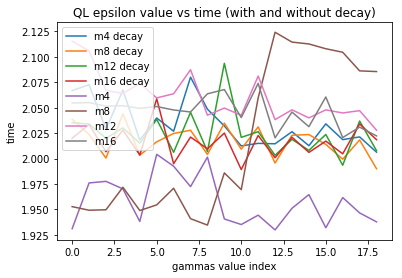

In [234]:
g4 = qled4['times_api'].values
g8 = qled8['times_api'].values
g12 = qled12['times_api'].values
g16 = qled16['times_api'].values

g24 = qlend4['times_api'].values
g28 = qlend8['times_api'].values
g212 = qlend12['times_api'].values
g216 = qlend16['times_api'].values




df = pd.DataFrame(data=list(zip(
        g4,g8,g12,g16,g24,g28,g212,g216)),
            columns = ['m4 decay','m8 decay','m12 decay','m16 decay','m4','m8','m12','m16'])
#df.set_index(pig4['gammas'])
df.plot(kind='line')
plt.xlabel('gammas value index')
plt.ylabel('time')

plt.title('QL epsilon value vs time (with and without decay)')

plt.savefig(GRAPHLOC/'fig13.png')

In [235]:
qled4 = pd.read_csv('data/fm_ql_lr_m4d.csv')
qled8 = pd.read_csv('data/fm_ql_lr_m8d.csv')
qled12 = pd.read_csv('data/fm_ql_lr_m12d.csv')
qled16 = pd.read_csv('data/fm_ql_lr_m16d.csv')

qlend4 = pd.read_csv('data/fm_ql_lr_m4nd.csv')
qlend8 = pd.read_csv('data/fm_ql_lr_m8nd.csv')
qlend12 = pd.read_csv('data/fm_ql_lr_m12nd.csv')
qlend16 = pd.read_csv('data/fm_ql_lr_m16nd.csv')

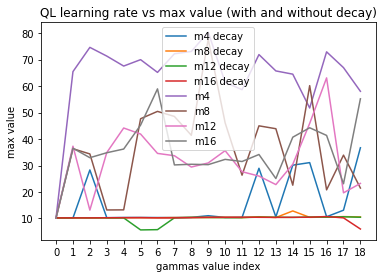

In [236]:
g4 = qled4['max_value'].values
g8 = qled8['max_value'].values
g12 = qled12['max_value'].values
g16 = qled16['max_value'].values

g24 = qlend4['max_value'].values
g28 = qlend8['max_value'].values
g212 = qlend12['max_value'].values
g216 = qlend16['max_value'].values




df = pd.DataFrame(data=list(zip(
        g4,g8,g12,g16,g24,g28,g212,g216)),
            columns = ['m4 decay','m8 decay','m12 decay','m16 decay','m4','m8','m12','m16'])
#df.set_index(pig4['gammas'])
df.plot(kind='line')
plt.xlabel('gammas value index')
plt.ylabel('max value')
plt.xticks(df.index)

plt.title('QL learning rate vs max value (with and without decay)')

plt.savefig(GRAPHLOC/'fig14.png')

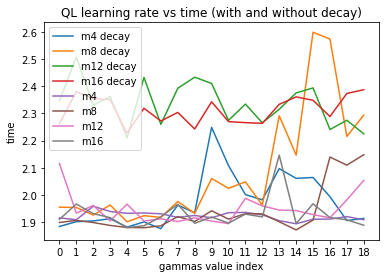

In [238]:
g4 = qled4['times_api'].values
g8 = qled8['times_api'].values
g12 = qled12['times_api'].values
g16 = qled16['times_api'].values

g24 = qlend4['times_api'].values
g28 = qlend8['times_api'].values
g212 = qlend12['times_api'].values
g216 = qlend16['times_api'].values




df = pd.DataFrame(data=list(zip(
        g4,g8,g12,g16,g24,g28,g212,g216)),
            columns = ['m4 decay','m8 decay','m12 decay','m16 decay','m4','m8','m12','m16'])
#df.set_index(pig4['gammas'])
df.plot(kind='line')
plt.xlabel('gammas value index')
plt.ylabel('time')
plt.xticks(df.index)

plt.title('QL learning rate vs time (with and without decay)')

plt.savefig(GRAPHLOC/'fig15.png')